C:\Users\thame_000\Anaconda3new\lib\site-packages\sklearn\lda.py:4: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)
C:\Users\thame_000\Anaconda3new\lib\site-packages\sklearn\qda.py:4: DeprecationWarning: qda.QDA has been moved to discriminant_analysis.QuadraticDiscriminantAnalysis in 0.17 and will be removed in 0.19.
  "in 0.17 and will be removed in 0.19.", DeprecationWarning)


(391, 10)
Index(['Date', 'Timestamp', 'Ticker', 'OpenPrice', 'HighPrice', 'LowPrice',
       'ClosePrice', 'TotalVolume', 'TotalQuantity', 'TotalTradeCount'],
      dtype='object')


C:\Users\thame_000\Anaconda3new\lib\site-packages\ipykernel\__main__.py:20: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(adjust=True,ignore_na=False,span=3,min_periods=2).mean()
C:\Users\thame_000\Anaconda3new\lib\site-packages\ipykernel\__main__.py:20: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(adjust=True,ignore_na=False,span=10,min_periods=9).mean()


End  of array
End  of array
End  of array
End  of array
Done
391
391
391
Done


C:\Users\thame_000\Anaconda3new\lib\site-packages\ipykernel\__main__.py:26: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=30).mean()
C:\Users\thame_000\Anaconda3new\lib\site-packages\ipykernel\__main__.py:27: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=30).std()
C:\Users\thame_000\Anaconda3new\lib\site-packages\ipykernel\__main__.py:26: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=5).mean()
C:\Users\thame_000\Anaconda3new\lib\site-packages\ipykernel\__main__.py:27: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=5).std()


12
<bound method NDFrame.sample of            Date Timestamp Ticker  OpenPrice  HighPrice  LowPrice  ClosePrice  \
70285  20151117  10:00:00   MSFT      53.43      53.50     53.42       53.47   
70286  20151117  10:01:00   MSFT      53.48      53.52     53.47       53.51   
70287  20151117  10:02:00   MSFT      53.52      53.52     53.47       53.49   
70288  20151117  10:03:00   MSFT      53.48      53.48     53.41       53.41   
70289  20151117  10:04:00   MSFT      53.41      53.42     53.39       53.39   
70290  20151117  10:05:00   MSFT      53.40      53.40     53.34       53.34   
70291  20151117  10:06:00   MSFT      53.34      53.35     53.32       53.33   
70292  20151117  10:07:00   MSFT      53.33      53.33     53.29       53.31   
70293  20151117  10:08:00   MSFT      53.30      53.31     53.26       53.27   
70294  20151117  10:09:00   MSFT      53.27      53.36     53.27       53.35   
70295  20151117  10:10:00   MSFT      53.35      53.38     53.34       53.38   
70296

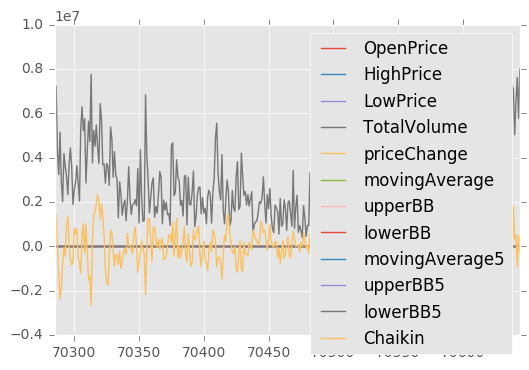

In [1]:
# import pandas
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.lda import LDA
from sklearn.qda import QDA
import tensorflow as tf

import pandas 
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline 
import matplotlib
matplotlib.style.use('ggplot')

#Chaikin Oscillator  
def Chaikin(df):  
    ad = (2 * df['ClosePrice'] - df['HighPrice'] - df['LowPrice']) / (df['HighPrice'] - df['LowPrice']) * df['TotalVolume']  
    Chaikin = pd.Series(pd.ewma(ad, span = 3, min_periods = 2) - pd.ewma(ad, span = 10, min_periods = 9), name = 'Chaikin')  
    df = df.join(Chaikin)  
    return df

## Bolinger Bands
def bbands(price, length=10, numsd=2):
    """ returns average, upper band, and lower band"""
    ave = pd.stats.moments.rolling_mean(price,length)
    sd = pd.stats.moments.rolling_std(price,length)
    upband = ave + (sd*numsd)
    dnband = ave - (sd*numsd)
    return np.round(ave,3), np.round(upband,3), np.round(dnband,3)


#Create output labels
def label(df, numberOfRowsAhead, priceDiffRange):
    # Create a list to store the data
    labelPosChang = []
    labelNegChang = []
    labelNoChang = []
    for i in range(0, len(df)):
       price=df.iloc[i]['ClosePrice']
       rowAheadCount=0
       if i == len(df)-1:
         print("End  of array")  
         labelPosChang.append(0)
         labelNegChang.append(0)
         labelNoChang.append(1)
         break 
          
       for j in range(i+1,i+numberOfRowsAhead):
        if j > len(df)-1:
           print("End  of array")  
           labelPosChang.append(0)
           labelNegChang.append(0)
           labelNoChang.append(1)
           break 
        priceDiff=df.iloc[j]['ClosePrice'] - price
         
        rowAheadCount = rowAheadCount +1 
        if priceDiff > priceDiffRange:
           labelPosChang.append(1)
           labelNegChang.append(0)
           labelNoChang.append(0)
           break
           
        elif priceDiff < -1*priceDiffRange:
           labelPosChang.append(0)
           labelNegChang.append(1)
           labelNoChang.append(0)
           break 
        elif numberOfRowsAhead-1 == rowAheadCount:
           labelPosChang.append(0)
           labelNegChang.append(0)
           labelNoChang.append(1)
           break
          
    print ('Done')
    print(len(labelPosChang))
    print(len(labelNegChang))
    print(len(df))
    df['Poschg'] = labelPosChang
    df['Negchg'] = labelNegChang
    df['Nochg'] = labelNoChang
   
    return df





data = pandas.read_csv('C://Users/thame_000/DailyTickSandPNov112017.csv')
data=data[data['Ticker']=='MSFT']
data=Chaikin(data)
data['priceChange'] = data['ClosePrice']- data['ClosePrice'].shift() 
data['priceChangePred'] = data['ClosePrice'].shift(-1) - data['ClosePrice']
 
data=label(data,5,0.02)
 
          
 
data['movingAverage'], data['upperBB'], data['lowerBB'] = bbands(data.ClosePrice, length=30, numsd=1)
data['movingAverage5'], data['upperBB5'], data['lowerBB5'] = bbands(data.ClosePrice, length=5, numsd=1)

data.fillna(0, inplace=True)
data.drop(data.head(15).index, inplace=True)
#data.to_csv('C://Users/thame_000/OutDataNew15.csv')
columnList=['OpenPrice','HighPrice','LowPrice','TotalVolume','priceChange','movingAverage','upperBB','lowerBB','movingAverage5','upperBB5','lowerBB5','Chaikin']
#pd.scatter_matrix(np.log(data[columnListAll]), alpha = 0.3, figsize = (14,8), diagonal = 'kde');

## Outlier detection and removal
from scipy import stats
outlier=data[(np.abs(stats.zscore(data[columnList])) > 3).all(axis=1)]
data=data[(np.abs(stats.zscore(data[columnList])) < 3).all(axis=1)]
#plt.figure(); data[columnList].plot();
 
y=data[['Poschg','Negchg','Nochg']]
X=data[columnList]

input_size=len(X.columns)

#### Data Preprocessing using MinMaxScaler
min_max_scaler = preprocessing.MinMaxScaler()
X = pd.DataFrame(min_max_scaler.fit_transform(X), columns=X.columns)
X = min_max_scaler.fit_transform(X.values.astype(float))
print(data.sample)
 
### Traing and Test set split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 



### Neural network 
n_nodes_hl1=500
n_nodes_hl2=500
n_nodes_hl3=500

n_classes=len(y.columns)
batch_size=50
dropout = 0.9 # Dropout, probability to keep units


x=tf.placeholder('float',[None,input_size])
y=tf.placeholder('float')
keep_prob = tf.placeholder(tf.float32) #dropout (keep probability)

### Create Neural Network
def neural_network_model(data, dropout):
        hidden_1_layer={'weights':tf.Variable(tf.random_normal([input_size,n_nodes_hl1])),
                   'biases':tf.Variable(tf.random_normal([n_nodes_hl1]))}
        hidden_2_layer={'weights':tf.Variable(tf.random_normal([n_nodes_hl1,n_nodes_hl2])),
                   'biases':tf.Variable(tf.random_normal([n_nodes_hl2]))}
        hidden_3_layer={'weights':tf.Variable(tf.random_normal([n_nodes_hl2,n_nodes_hl3])),
                   'biases':tf.Variable(tf.random_normal([n_nodes_hl3]))}
        output_layer={'weights':tf.Variable(tf.random_normal([n_nodes_hl3,n_classes])),
                   'biases':tf.Variable(tf.random_normal([n_classes]))}

        # layer 1 input_data*weights + biases
        l1=tf.add(tf.matmul(data,hidden_1_layer['weights']),hidden_1_layer['biases'])
        l1=tf.nn.relu(l1)
        l1 = tf.nn.dropout(l1, dropout)

        l2=tf.add(tf.matmul(l1,hidden_2_layer['weights']),hidden_2_layer['biases'])
        l2=tf.nn.relu(l2)
        l2 = tf.nn.dropout(l2, dropout)

        l3=tf.add(tf.matmul(l2,hidden_3_layer['weights']),hidden_3_layer['biases'])
        l3=tf.nn.relu(l3)
        l3 = tf.nn.dropout(l3, dropout)
    
        output=tf.add(tf.matmul(l3,output_layer['weights']),output_layer['biases'])
        return output
##Traing network
def train_neural_network(x, keep_prob):
    prediction=neural_network_model(x, keep_prob)
    cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(prediction,y))
    #learning rate defaulted
    optimizer=tf.train.AdamOptimizer().minimize(cost)
    
    hm_epochs=200
    
    countMin = 0 
    minLossEpoch = 1000
    maxAccuracy=0;
    logs_path="C:/Users/thame_000/tb"
    with tf.Session() as sess:
       writer = tf.train.SummaryWriter(logs_path, graph=tf.get_default_graph())
       sess.run(tf.initialize_all_variables())
       correct=tf.equal(tf.argmax(prediction,1),tf.argmax(y,1))
       accuracy=tf.reduce_mean(tf.cast(correct,'float'))
       # create a summary for our cost and accuracy
        
       tf.scalar_summary("trainaccuracy", accuracy)
       
       # merge all summaries into a single "operation" which we can execute in a session 
       summary_op = tf.merge_all_summaries()
        
       test_summary=tf.summary.scalar("testaccuracy", accuracy)
    
       for epoch in range(hm_epochs):
           epoch_loss=0
           batchSize=5
           batchStartIndex= 0
           batchEndIndex= batchSize
           batchCount=0
           lengthOfTrainingSet=len(X_train)
           #print("Length training set",lengthOfTrainingSet)
           while batchEndIndex <= lengthOfTrainingSet:
               batchCount= batchCount+1
               X_train_batch=X_train[batchStartIndex:batchEndIndex]
               y_train_batch=y_train[batchStartIndex:batchEndIndex]
               _,c,summary=sess.run([optimizer,cost, summary_op],feed_dict={x:X_train_batch,y:y_train_batch, keep_prob: dropout})
               #print('Epoch',epoch,'completed out of',hm_epochs,'loss_epoch:',c)
               #currAccuracy=accuracy.eval({x:X_test,y:y_test,keep_prob: dropout})
                # To log validation accuracy.
               valid_acc, valid_summ = sess.run(
                            [accuracy, test_summary],
                                feed_dict={x:X_test,y:y_test, keep_prob: dropout})
               writer.add_summary(valid_summ, epoch *  batchSize + batchCount)
               currAccuracy=valid_acc
               #print('Accuracy:',currAccuracy)
               if epoch == 0:
                  maxAccuracy=currAccuracy
               if currAccuracy >  maxAccuracy:
                  maxAccuracy=currAccuracy
                  print('maxAccuracy:',maxAccuracy)
               if c < minLossEpoch :
                 countMin = countMin + 1 
               #if countMin > 100 :
                 #break  q
               if batchEndIndex >lengthOfTrainingSet-1 :
                 break
               batchStartIndex=batchEndIndex
               batchEndIndex=batchEndIndex+batchSize
               if batchEndIndex >lengthOfTrainingSet-1 :
                  batchEndIndex=lengthOfTrainingSet
              
               # write log
               writer.add_summary(summary, epoch *  batchSize + batchCount)
       print('maxAccuracy',maxAccuracy)
       
    

## Create and Train Network
train_neural_network(x, keep_prob)
                        

In [ ]:
## work on CNN